# In progress 

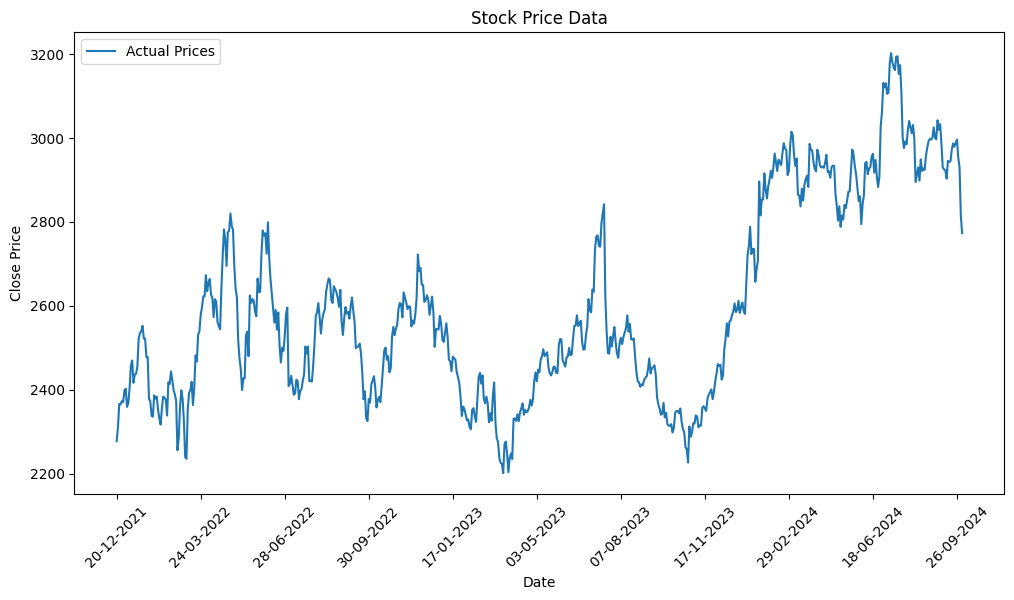

c:\Users\shivanna\OneDrive\Desktop\Final_Stupid\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 49, 50)         │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,507 (169.95 KB)

 Trainable params: 43,507 (169.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - loss: 0.0756 - val_loss: 0.0103
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0192 - val_loss: 0.0653
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0132 - val_loss: 0.1026
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0128 - val_loss: 0.0410
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0127 - val_loss: 0.0362
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0099 - val_loss: 0.0544
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0107 - val_loss: 0.0650
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0091 - val_loss: 0.0477
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0089 - val_loss: 0.0545
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0101 - val_loss: 0.0349
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0089 - val_loss: 0.0579
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0085 - va

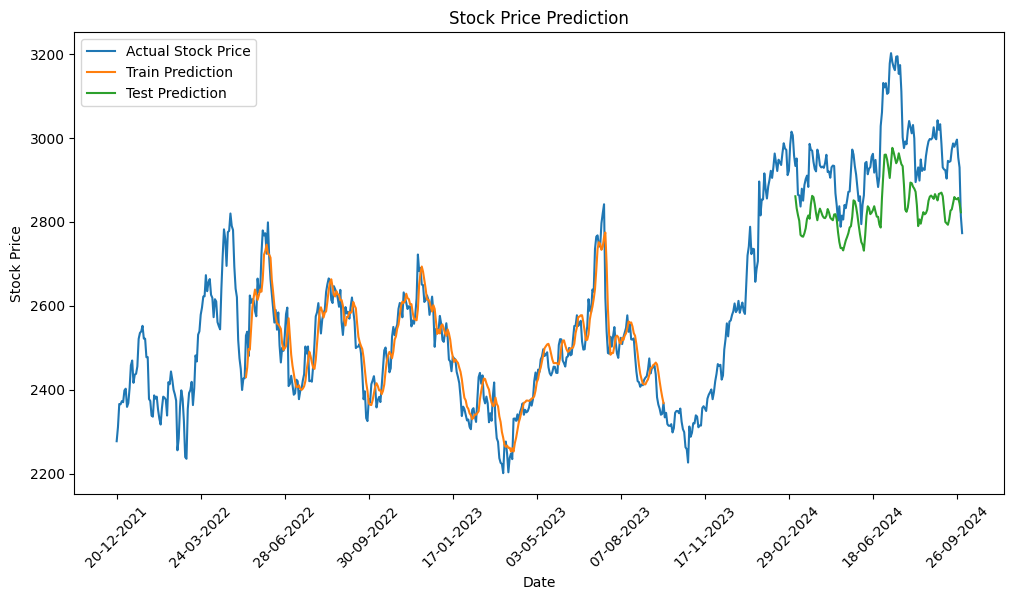

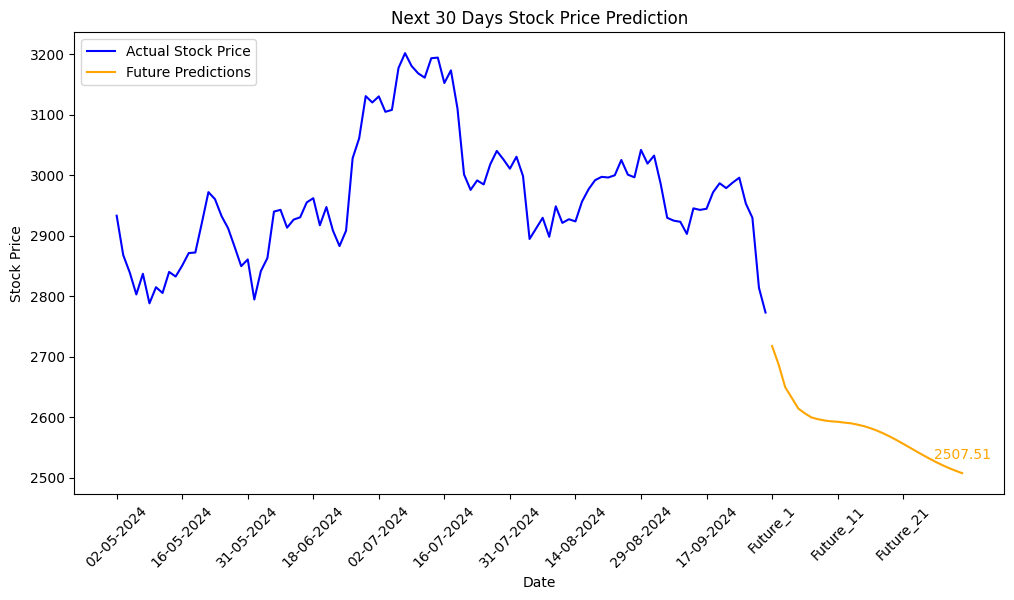

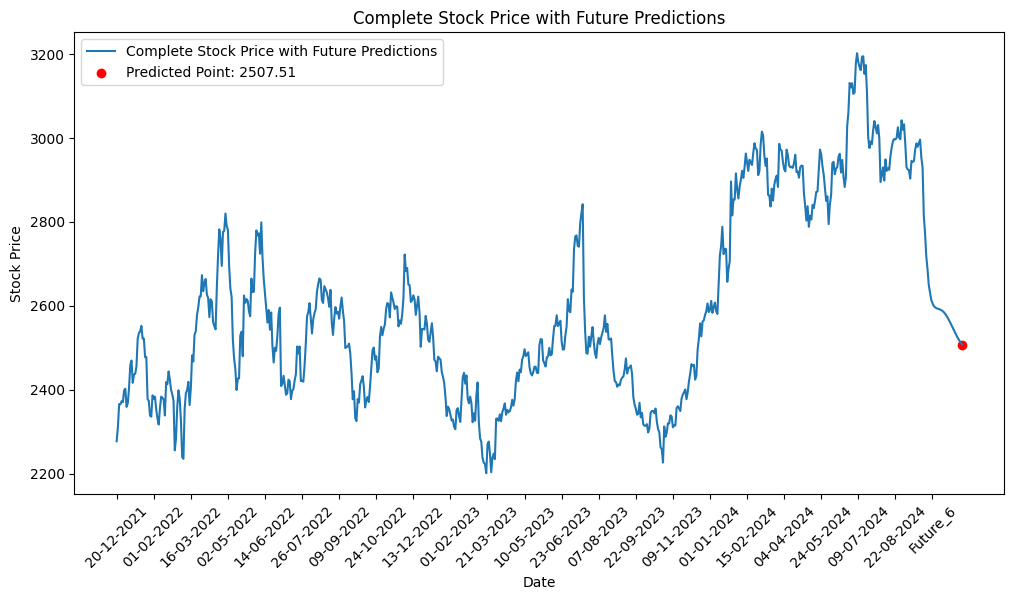

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout
import math
from sklearn.metrics import mean_squared_error
import os

# Load the dataset
df = pd.read_csv("RIL.csv")

# Extract necessary columns
dates = df['Date']  # Use the Date column as is
df1 = df['Close']

# Plot the original data with dates on x-axis
plt.figure(figsize=(12, 6))
plt.plot(dates, df1, label="Actual Prices")
plt.title("Stock Price Data")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45, ticks=np.arange(0, len(dates), step=len(dates) // 10))
plt.legend()
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# Define a function to create the dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Prepare training and testing datasets
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input data into [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Append future prediction dates
future_dates = [f"Future_{i+1}" for i in range(30)]  # Generate placeholder future dates

# Plot actual vs predictions with date ticks
plt.figure(figsize=(12, 6))
plt.plot(dates, scaler.inverse_transform(df1), label="Actual Stock Price")
plt.plot(dates[time_step:len(train_predict) + time_step], train_predict, label="Train Prediction")
plt.plot(dates[len(train_predict) + (time_step * 2) + 1:len(train_predict) + (time_step * 2) + 1 + len(test_predict)], test_predict, label="Test Prediction")
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45, ticks=np.arange(0, len(dates), step=len(dates) // 10))
plt.legend()
plt.show()

# Predict the next 30 days
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []

n_steps = 100
for i in range(30):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    lst_output.extend(yhat.tolist())
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

# Transform future predictions back to the original scale
future_predictions = scaler.inverse_transform(lst_output)

# Plot predictions for the next 30 days
# Combine the last 100 actual dates and future dates
combined_dates = dates[-100:].tolist() + future_dates

# Combine the last 100 actual prices and future predictions
combined_prices = np.concatenate((scaler.inverse_transform(df1[-100:]), future_predictions), axis=0)

# Calculate tick indices for every 30 days
tick_indices = list(range(0, len(combined_dates), 10))

# Plot the predictions for both actual and future data
plt.figure(figsize=(12, 6))

# Plot the actual stock prices (Last 100 Days)
plt.plot(dates[-100:], scaler.inverse_transform(df1[-100:]), label="Actual Stock Price", color='blue')

# Plot the future stock prices (Next 30 Days)
plt.plot(future_dates, future_predictions, label="Future Predictions", color='orange')

# Annotate the future price at the last point
for i, txt in enumerate(future_predictions[-1:]):
    plt.annotate(f"{txt[0]:.2f}", (future_dates[-1], txt[0]), textcoords="offset points", xytext=(0,10), ha='center', color='orange')

# Adjust x-ticks to show every 30th date
plt.xticks(ticks=tick_indices, labels=[combined_dates[i] for i in tick_indices], rotation=45)

# Title and labels
plt.title("Next 30 Days Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")

# Show legends for both actual and future predictions
plt.legend(loc='upper left')
plt.show()

# # Extend the original data with predictions
df3 = df1.tolist()
df3.extend(lst_output)

# Combine actual and future dates
extended_dates = dates.tolist() + future_dates

# Combine actual prices and future predictions
# Update this line to get all prices for all dates
extended_prices = scaler.inverse_transform(df3)

# Plot predictions for both actual and future data
plt.figure(figsize=(12, 6))
plt.plot(extended_dates, extended_prices, label="Complete Stock Price with Future Predictions")

# Highlight the predicted point on the complete graph (last future point)
plt.scatter(future_dates[-1], future_predictions[-1][0], color='red', label=f"Predicted Point: {future_predictions[-1][0]:.2f}")

# Calculate tick indices for every 15 days
tick_indices = list(range(0, len(extended_dates), 30))

# Set custom x-ticks for every 15th day
plt.xticks(ticks=tick_indices, labels=[extended_dates[i] for i in tick_indices], rotation=45)

# Title and labels
plt.title("Complete Stock Price with Future Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")

# Show the legend
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [5]:
from joblib import dump

In [6]:
dump(model, 'trainedModel\model.joblib')

['trainedModel\\model.joblib']

In [3]:
import joblib

# Save the trained model
joblib.dump(model, "trainedModel\stock_price_model.pkl")

# Save the scaler (important for transforming input data during prediction)
joblib.dump(scaler, "trainedModel\scaler.pkl")


['trainedModel\\scaler.pkl']